In [36]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_read = pd.read_csv(mouse_drug_data_to_load)
clinical_read = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
data_combined = pd.merge(clinical_read, mouse_read, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [70]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = data_combined.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_dataframe = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_dataframe.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [38]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stan_error = data_combined.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
sem_data_frame = pd.DataFrame(tumor_stan_error)
# Preview DataFrame
sem_data_frame.reset_index().head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [39]:
# Minor Data Munging to Re-Format the Data Frames
tumor_dataframe = tumor_dataframe.reset_index()
tumor_volume_mean= tumor_dataframe.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_volume_mean.reset_index().head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [40]:
tumor_stan_error = tumor_stan_error.reset_index()
tumor_sem = tumor_stan_error.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


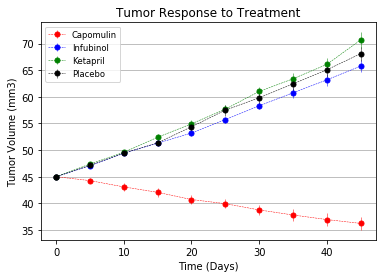

In [41]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_volume_mean.index, tumor_volume_mean["Capomulin"], yerr=tumor_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_mean.index, tumor_volume_mean["Infubinol"], yerr=tumor_sem["Infubinol"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_mean.index, tumor_volume_mean["Ketapril"], yerr=tumor_sem["Ketapril"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_volume_mean.index, tumor_volume_mean["Placebo"], yerr=tumor_sem["Placebo"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
# Save the Figure

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [42]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_met_sites = data_combined.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
tumor_met_sites_frame = pd.DataFrame(tumor_met_sites)
# Preview DataFrame
tumor_met_sites_frame.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [43]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
tumor_stan_error_metsize = data_combined.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
sem_met_data_frame = pd.DataFrame(tumor_stan_error_metsize)
# Preview DataFrame
sem_met_data_frame.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [44]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_sites_frame = tumor_met_sites_frame.reset_index()
met_sites_mean = tumor_met_sites_frame.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sites_mean.reset_index().head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [45]:
tumor_stan_error_metsize = tumor_stan_error_metsize.reset_index()
tumor_sem_mets = tumor_stan_error_metsize.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
tumor_sem_mets.reset_index().head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


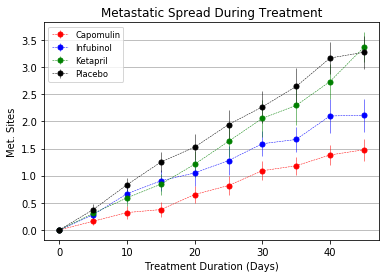

In [46]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_sites_mean.index, met_sites_mean["Capomulin"], yerr=tumor_sem_mets["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_mean.index, met_sites_mean["Infubinol"], yerr=tumor_sem_mets["Infubinol"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_mean.index, met_sites_mean["Ketapril"], yerr=tumor_sem_mets["Ketapril"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_mean.index, met_sites_mean["Placebo"], yerr=tumor_sem_mets["Placebo"], color="k", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
# Save the Figure

# Show the Figure
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)
plt.show()

## Survival Rates

In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_mice = data_combined.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
survival_dataframe = pd.DataFrame(survival_mice)
# Preview DataFrame
survival_dataframe.reset_index().head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [48]:
# Minor Data Munging to Re-Format the Data Frames
survival_dataframe = survival_dataframe.reset_index()
mouse_survival_rate = survival_dataframe.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
# Preview the Data Frame
mouse_survival_rate.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


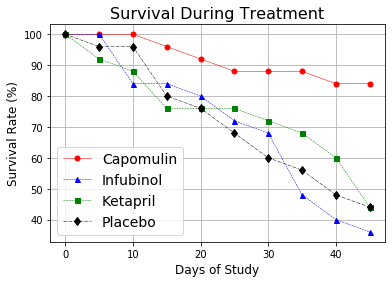

In [49]:
# Generate the Plot (Accounting for percentages) dividing by number of mice to start with
plt.plot(100 * mouse_survival_rate["Capomulin"] / 25, "ro", linestyle="solid", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_survival_rate["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_survival_rate["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouse_survival_rate["Placebo"] / 25 , "kd", linestyle="dashdot", markersize=6, linewidth=0.50)

# Set x and y axis labels and title of the chart
plt.title("Survival During Treatment", fontsize=16)
plt.ylabel("Survival Rate (%)",  fontsize=12)
plt.xlabel("Days of Study", fontsize=12)
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize=14, fancybox=True)

# Show the Figure
plt.show()

# Save the Figure


## Summary Bar Graph

In [136]:
# Calculate the percent changes for each drug

drug_percentage_cap = ((tumor_volume_mean["Capomulin"][45] -tumor_volume_mean["Capomulin"][0])/45) * 100
drug_percentage_inf = ((tumor_volume_mean["Infubinol"][45] - tumor_volume_mean["Infubinol"][0])/45) * 100
drug_percentage_ket = ((tumor_volume_mean["Ketapril"][45] - tumor_volume_mean["Ketapril"][0])/45) * 100
drug_percentage_plac = ((tumor_volume_mean["Placebo"][45] - tumor_volume_mean["Placebo"][0])/45) * 100

drug_percentage = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                                "Percent": [drug_percentage_cap, drug_percentage_inf, drug_percentage_ket, drug_percentage_plac]
                               })

# Display the data to confirm

drug_percentage

,Drug,Percent
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


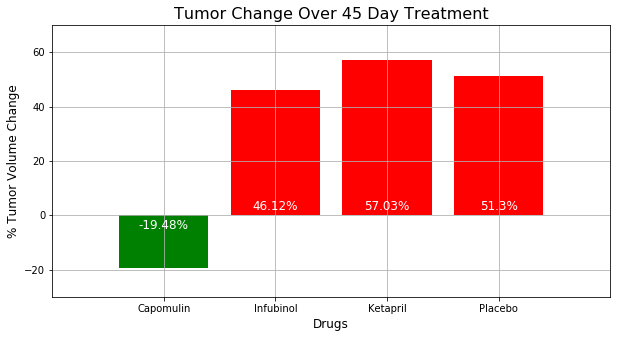

In [140]:
plt.figure(figsize=(10, 5))
plt.xlim(-1, 4)
plt.ylim(-30, 70)
plt.bar("Drug", "Percent", data=drug_percentage, color=["g","r","r","r"])
plt.grid(True)
plt.title("Tumor Change Over 45 Day Treatment", fontsize=16)
plt.xlabel("Drugs", fontsize=12)
plt.ylabel("% Tumor Volume Change", fontsize=12)

count = 0
for x in drug_percentage['Percent']:
    if x < 0:
        y_value = -5
    else:
        y_value = 2
    plt.text(count, y_value, str(round(x, 2)) + '%', ha = 'center', color = 'white', fontsize = 12)
    count += 1
    
plt.show()